In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

print(class_names_label)

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 06C6-74B6

 Directory of C:\Users\madhav.kumar\Documents\AI-ML-DS\Image Classification

20-12-2023  11.59 AM    <DIR>          .
20-12-2023  11.59 AM    <DIR>          ..
14-12-2023  12.13 PM    <DIR>          .ipynb_checkpoints
04-12-2023  12.54 PM       363,152,213 archive (2).zip
05-12-2023  11.53 AM                72 Exploratory Data Analysis(EDA).ipynb
05-12-2023  11.52 AM           389,834 image-classification-using-cnn-94-accuracy.ipynb
18-12-2023  04.59 PM         1,908,932 image_classifficatin_car_insurance.ipynb
20-12-2023  11.59 AM         3,603,967 image_classification_intel_data.ipynb
13-12-2023  03.51 PM    <DIR>          intel_data
22-11-2023  12.11 PM           134,325 kbs.ipynb
13-12-2023  03.52 PM    <DIR>          Ripik_AI
03-12-2023  04.19 PM            35,616 sample_submission-3.csv
               7 File(s)    369,224,959 bytes
               5 Dir(s)  315,732,705,280 bytes free


In [4]:
for folder in os.listdir('intel_data/seg_train/seg_train'):
    print(folder)

buildings
forest
glacier
mountain
sea
street


In [5]:
# dataset = 'intel_data/seg_train/seg_train'
# for folder in os.listdir(dataset):
#     print(folder)
#     for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    
#                     # Get the path name of the image
#         img_path = os.path.join(os.path.join(dataset, folder), file)
#         print(img_path)

img_path = 'intel_data/seg_train/seg_train/buildings/0.jpg'

# Open and resize the img
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE) 
print(image)

[[[247 247 245]
  [247 247 245]
  [248 248 246]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 [[246 246 244]
  [247 247 245]
  [247 247 245]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 [[246 246 244]
  [246 246 244]
  [247 247 245]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 ...

 [[ 47  46  44]
  [ 62  61  59]
  [ 49  48  46]
  ...
  [ 51  46  43]
  [ 45  40  37]
  [ 94  89  86]]

 [[ 77  76  74]
  [ 47  46  44]
  [ 43  42  40]
  ...
  [ 22  17  14]
  [ 55  50  47]
  [ 39  34  31]]

 [[ 59  58  56]
  [ 55  54  52]
  [ 60  59  57]
  ...
  [ 31  26  23]
  [ 51  46  43]
  [ 63  58  55]]]


In [6]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['intel_data/seg_train/seg_train', 'intel_data/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading intel_data/seg_train/seg_train


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:04<00:00, 505.72it/s]


Loading intel_data/seg_test/seg_test


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [00:01<00:00, 481.31it/s]


In [8]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [9]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


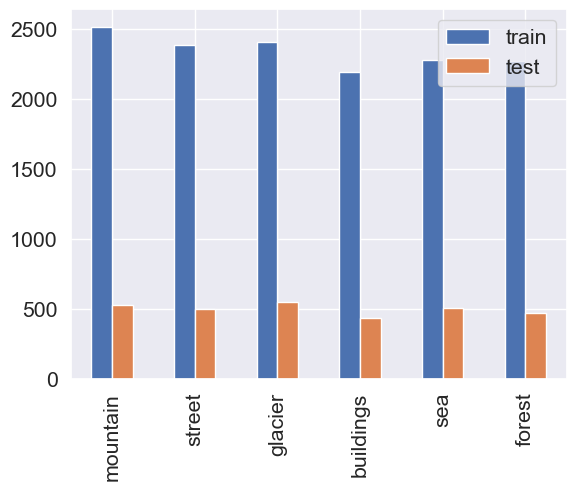

In [10]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

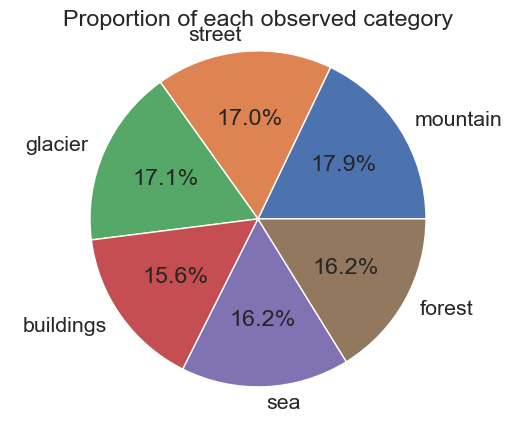

In [11]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [12]:
#scale the data
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [13]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

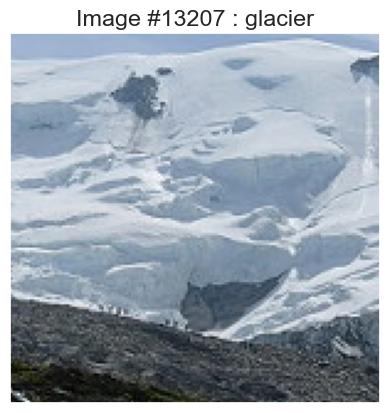

In [14]:
display_random_image(class_names, train_images, train_labels)

In [15]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

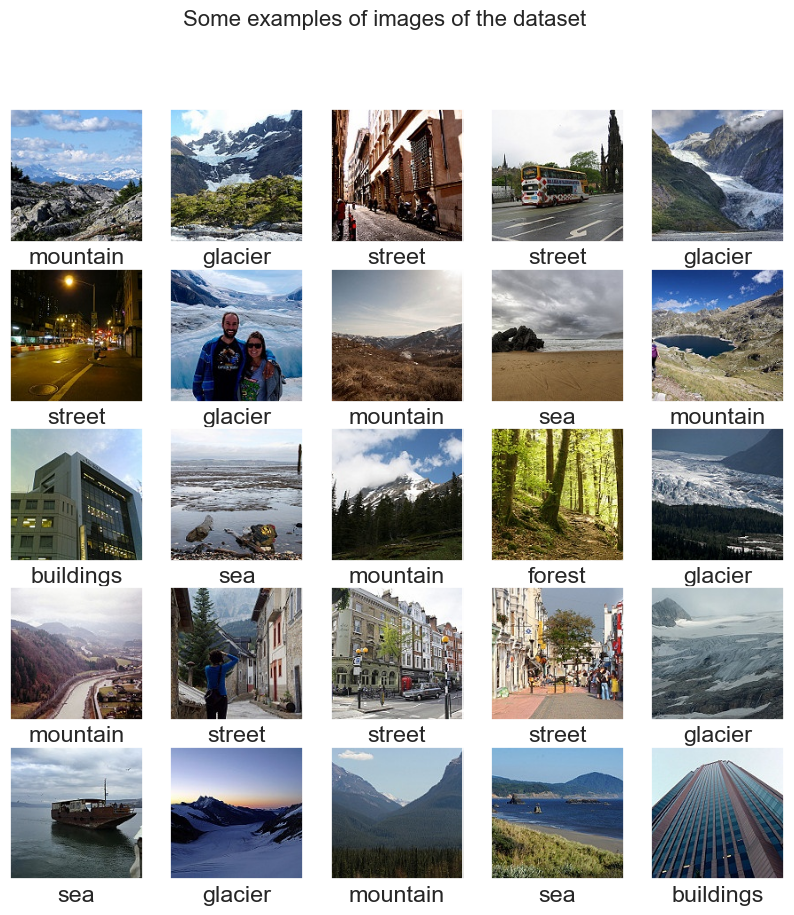

In [16]:
display_examples(class_names, train_images, train_labels)

- Conv2D: \(32 filters of size 3 by 3\) The features will be "extracted" from the image
- MaxPooling2D: The images get half sized
- Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values
- Relu : given a value x, returns max(x, 0).
- Softmax: 6 neurons, probability that the image belongs to one of the classes.

In [17]:
model = tf.keras.Sequential([
    # First convolutional layer with 32 filters, each of size (3, 3), and ReLU activation function
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    # Max pooling layer with a pool size of (2, 2)
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolutional layer with 32 filters, each of size (3, 3), and ReLU activation function
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    # Max pooling layer with a pool size of (2, 2)
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten layer to convert the 2D output to a 1D vector
    tf.keras.layers.Flatten(),
     # Fully connected dense layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
     # Output layer with 6 neurons (classification problem) and softmax activation function
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

- Optimizer: adam = RMSProp + Momentum.
- Momentum = takes into account past gradient to have a better update.
- RMSProp = exponentially weighted average of the squares of past gradients.
- Loss function: sparse categorical crossentropy for classification, each images belongs to one class only

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20


88/88 [==============================] - 45s 499ms/step - loss: 1.0784 - accuracy: 0.6049 - val_loss: 0.7921 - val_accuracy: 0.6997
Epoch 2/20
88/88 [==============================] - 40s 455ms/step - loss: 0.6729 - accuracy: 0.7561 - val_loss: 0.7638 - val_accuracy: 0.7029
Epoch 3/20
88/88 [==============================] - 39s 445ms/step - loss: 0.4909 - accuracy: 0.8285 - val_loss: 0.6270 - val_accuracy: 0.7720
Epoch 4/20
88/88 [==============================] - 39s 442ms/step - loss: 0.3483 - accuracy: 0.8828 - val_loss: 0.7185 - val_accuracy: 0.7474
Epoch 5/20
88/88 [==============================] - 39s 439ms/step - loss: 0.2462 - accuracy: 0.9222 - val_loss: 0.6516 - val_accuracy: 0.7952
Epoch 6/20
88/88 [==============================] - 41s 465ms/step - loss: 0.1572 - accuracy: 0.9536 - val_loss: 0.7106 - val_accuracy: 0.7873
Epoch 7/20
88/88 [==============================] - 39s 448ms/step - loss: 0.1052 - accuracy: 0.9707 - val_loss: 0.7680 - val_accuracy: 0.78

In [20]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

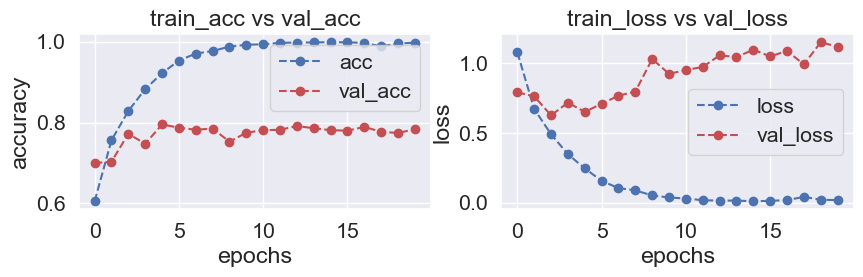

In [21]:
plot_accuracy_loss(history)

In [22]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 3s 31ms/step - loss: 1.1528 - accuracy: 0.7800


94/94 [==============================] - 3s 32ms/step


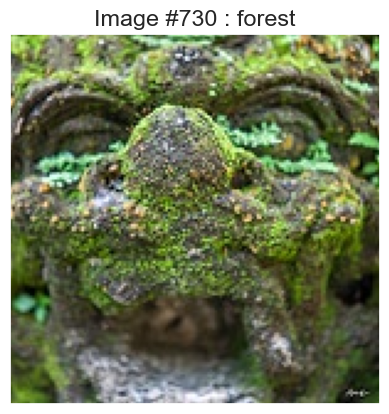

In [23]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [24]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

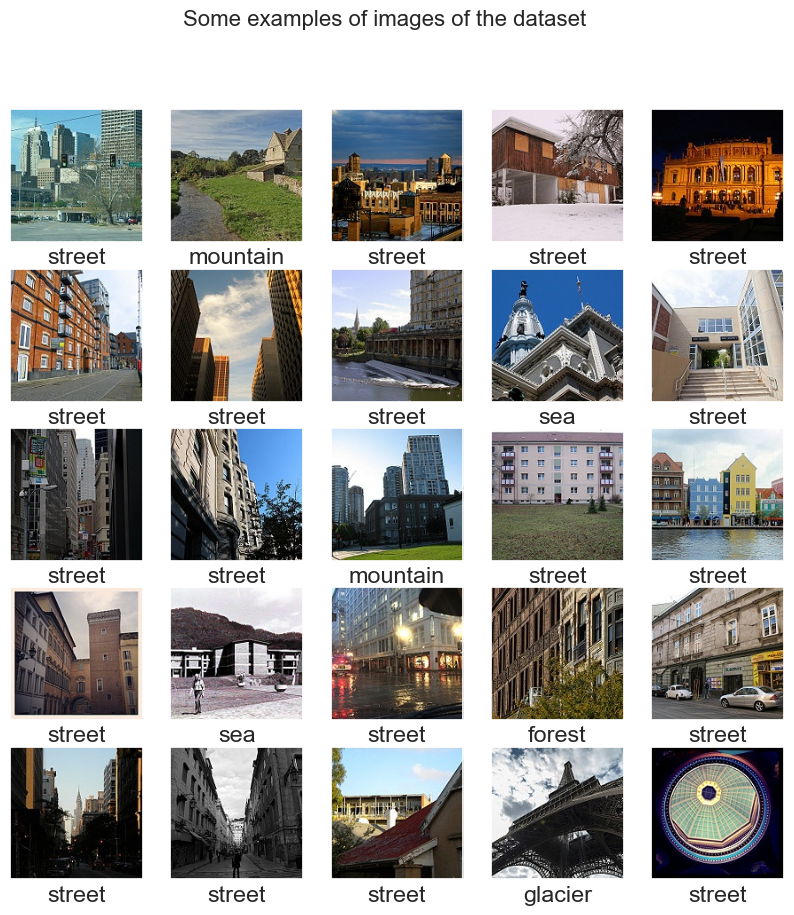

In [25]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

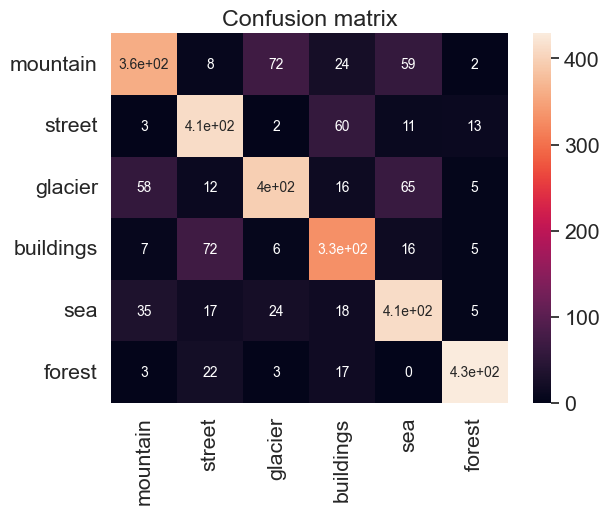

In [26]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

 Conclusion: The classifier has trouble with 2 kinds of images.

It has trouble with street and buildings. Well, it can be understandable as as there are buildings in the street. It has also trouble with sea, glacier and moutain as well.

In [27]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [28]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

94/94 [==============================] - 193s 2s/step


### Visualize the features through PCA


In [31]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [32]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

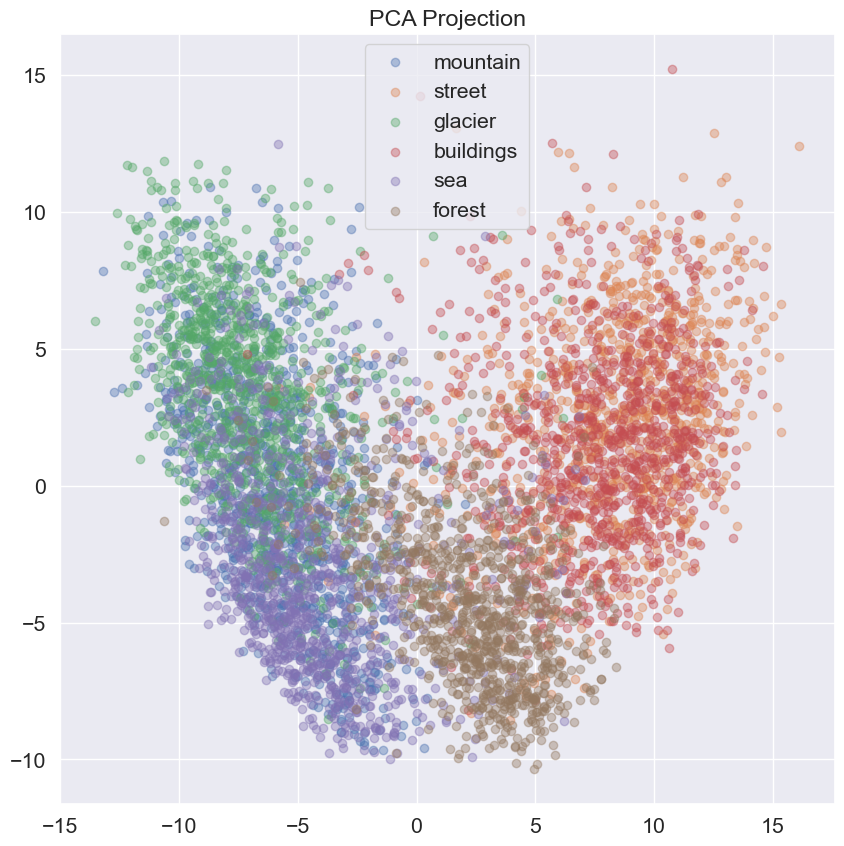

In [33]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

## Training on top of VGG### train a simple one-layer Neural Network on the features extracted from VGG


In [34]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
88/88 [==============================] - 1s 6ms/step - loss: 0.5473 - accuracy: 0.7959 - val_loss: 0.3458 - val_accuracy: 0.8693
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 0.3059 - accuracy: 0.8924 - val_loss: 0.3473 - val_accuracy: 0.8675
Epoch 3/15
88/88 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.9127 - val_loss: 0.3100 - val_accuracy: 0.8839
Epoch 4/15
88/88 [==============================] - 0s 4ms/step - loss: 0.2117 - accuracy: 0.9269 - val_loss: 0.3450 - val_accuracy: 0.8742
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 0.1737 - accuracy: 0.9404 - val_loss: 0.3204 - val_accuracy: 0.8871
Epoch 6/15
88/88 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.9518 - val_loss: 0.3501 - val_accuracy: 0.8767
Epoch 7/15
88/88 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9576 - val_loss: 0.3192 - val_accuracy: 0.8871
Epoch 8/15
88/88 [==

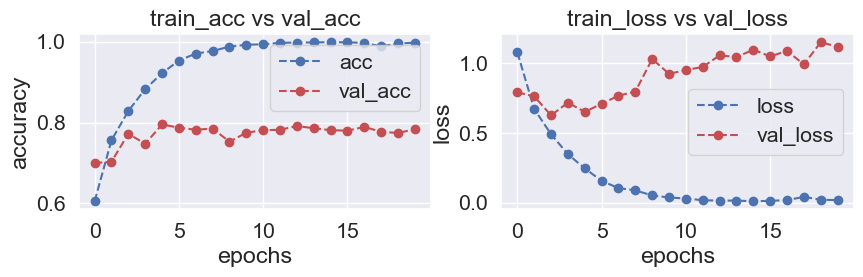

In [35]:
plot_accuracy_loss(history)


In [36]:
test_loss = model2.evaluate(test_features, test_labels)


94/94 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8767


## Ensemble Neural Networks


In [37]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [38]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [40]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2220 - accuracy: 0.9311 - val_loss: 0.1918 - val_accuracy: 0.9484
Epoch 2/10
79/79 [==============================] - 1s 9ms/step - loss: 0.1079 - accuracy: 0.9672 - val_loss: 0.1847 - val_accuracy: 0.9546
Epoch 3/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0691 - accuracy: 0.9793 - val_loss: 0.1836 - val_accuracy: 0.9564
Epoch 4/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0426 - accuracy: 0.9899 - val_loss: 0.1611 - val_accuracy: 0.9653
Epoch 5/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0329 - accuracy: 0.9922 - val_loss: 0.1616 - val_accuracy: 0.9662
Epoch 6/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0248 - accuracy: 0.9954 - val_loss: 0.1723 - val_accuracy: 0.9635
Epoch 7/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0177 - accuracy: 0.9978 - val_loss: 0.1692 - val_accuracy: 0.9626
Epoch 8/10
79/79 [==